# SENTIMENT ANALYSIS ON PERSONAL FINANCE MANAGEMENT

### AIM: To identify and extract opinions on Personal finance management.

### Methodology : 
### 1) Clean and Preprocess text data using regular expressions and NLTK
### 2) Visualization using word cloud
### 3)  Performing sentiment analysis using TextBlob model

### Conclusion: Based on the visualised data, it seems the idea of private financial management is duly accepted. 

In [1]:
# Libraries used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
import re
import string
import nltk
from nltk.tokenize import word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords
#from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA # Using SentimentIntensityAnalyzer for analyzing the sentiments in the text data.
from textblob import TextBlob

# Load the data

In [2]:
pfm = pd.read_csv('pfm.txt', sep = '.', names = ["Reviews", "Nan"])

In [3]:
# Display the first five rows
pfm.head()

,Reviews,Nan
0,A business accountant in Melbourne mainly focu...,NaN
1,The management generally hires them for mainta...,
2,They advise in other aspects that allow the ma...,NaN
3,People generally confuse these accountants wit...,NaN
4,The business accountants make estimates and tr...,


In [4]:
# Length of text data.
pfm.Reviews.value_counts().sum()

20

In [5]:
# Dropping the Nan column
pfm.drop(['Nan'], axis = 1, inplace = True)

# Cleaning the data

In [6]:
# Removing all the numbers in the text, because it is not relevant.
no_numbers = []
for i in pfm['Reviews']:
    hold = re.sub('\w*\d\w*', '', i)
    no_numbers.append(hold)
pfm['no_numbers'] = no_numbers
pfm.head() # displays the first five lines.

,Reviews,no_numbers
0,A business accountant in Melbourne mainly focu...,A business accountant in Melbourne mainly focu...
1,The management generally hires them for mainta...,The management generally hires them for mainta...
2,They advise in other aspects that allow the ma...,They advise in other aspects that allow the ma...
3,People generally confuse these accountants wit...,People generally confuse these accountants wit...
4,The business accountants make estimates and tr...,The business accountants make estimates and tr...


In [7]:
# Converting the reviews to lower cases because the data is case sensitive.
lower_case =[]
for i in pfm['no_numbers']:
    hold = i.lower()
    lower_case.append(hold)

pfm['lower_case'] = lower_case
pfm.head()

,Reviews,no_numbers,lower_case
0,A business accountant in Melbourne mainly focu...,A business accountant in Melbourne mainly focu...,a business accountant in melbourne mainly focu...
1,The management generally hires them for mainta...,The management generally hires them for mainta...,the management generally hires them for mainta...
2,They advise in other aspects that allow the ma...,They advise in other aspects that allow the ma...,they advise in other aspects that allow the ma...
3,People generally confuse these accountants wit...,People generally confuse these accountants wit...,people generally confuse these accountants wit...
4,The business accountants make estimates and tr...,The business accountants make estimates and tr...,the business accountants make estimates and tr...


In [8]:
# Removing Punctuations, because they do not add any form of relevance.

Final_form = []
for i in pfm['lower_case'] :
    hold = re.sub('[%s]'%re.escape(string.punctuation), ' ',str(i))
    Final_form.append(hold)
    
pfm['Final_form'] = Final_form
pfm.head()

,Reviews,no_numbers,lower_case,Final_form
0,A business accountant in Melbourne mainly focu...,A business accountant in Melbourne mainly focu...,a business accountant in melbourne mainly focu...,a business accountant in melbourne mainly focu...
1,The management generally hires them for mainta...,The management generally hires them for mainta...,the management generally hires them for mainta...,the management generally hires them for mainta...
2,They advise in other aspects that allow the ma...,They advise in other aspects that allow the ma...,they advise in other aspects that allow the ma...,they advise in other aspects that allow the ma...
3,People generally confuse these accountants wit...,People generally confuse these accountants wit...,people generally confuse these accountants wit...,people generally confuse these accountants wit...
4,The business accountants make estimates and tr...,The business accountants make estimates and tr...,the business accountants make estimates and tr...,the business accountants make estimates and tr...


In [9]:
#Dropping the rest and using only Final_form
pfm.drop(['Reviews'], axis = 1, inplace = True)
pfm.drop(['no_numbers'], axis = 1, inplace = True)
pfm.drop(['lower_case'], axis = 1, inplace = True)
pfm.head()

,Final_form
0,a business accountant in melbourne mainly focu...
1,the management generally hires them for mainta...
2,they advise in other aspects that allow the ma...
3,people generally confuse these accountants wit...
4,the business accountants make estimates and tr...


In [10]:
tokenizer = RegexpTokenizer(r'\w+') # seperates every sentence into individual words


In [11]:
#  Removes Stopwords(removing words that have little or no meaning in the text data that occur frequently. examples: is,and,the,a, so on.)
stopwords = stopwords.words('english') 
Pfm = list(pfm.Final_form)
token = []
for words in Pfm:
    toks = tokenizer.tokenize(words)
    toks= [t.lower() for t in toks if t.lower() not in stopwords]
    token.extend(toks) # adds the content of a list into another list

In [12]:
# Shows you the top 5 frequent the words and how much the occur.
word_frequency = nltk.FreqDist(token)
word_frequency.most_common(5)

[('would', 12), ('cash', 5), ('business', 4), ('financial', 4), ('able', 4)]

# Visualization

# Word cloud

### word cloud is used in depicting key words in a corpus of text. It also gives a wonderful visualization of the text data,the more frequent a word is used in the text, the bigger in size it appears.we could also use word cloud to know the kind of words being used around or associated with  the word 'Personal finance management'.

In [13]:

# creating a fucntion.
def wordcloud(words,title):
    cloud = WordCloud(width=1920, height=1080,max_font_size=200, max_words=300, background_color="black").generate(words)
    plt.figure(figsize=(20,20))
    plt.imshow(cloud, interpolation="gaussian")
    plt.axis("off") 
    plt.title(title, fontsize=60)
    plt.show()

In [14]:
# Putting the reviews in string format.
str_ = ''
for i in Pfm:
    str_ += i

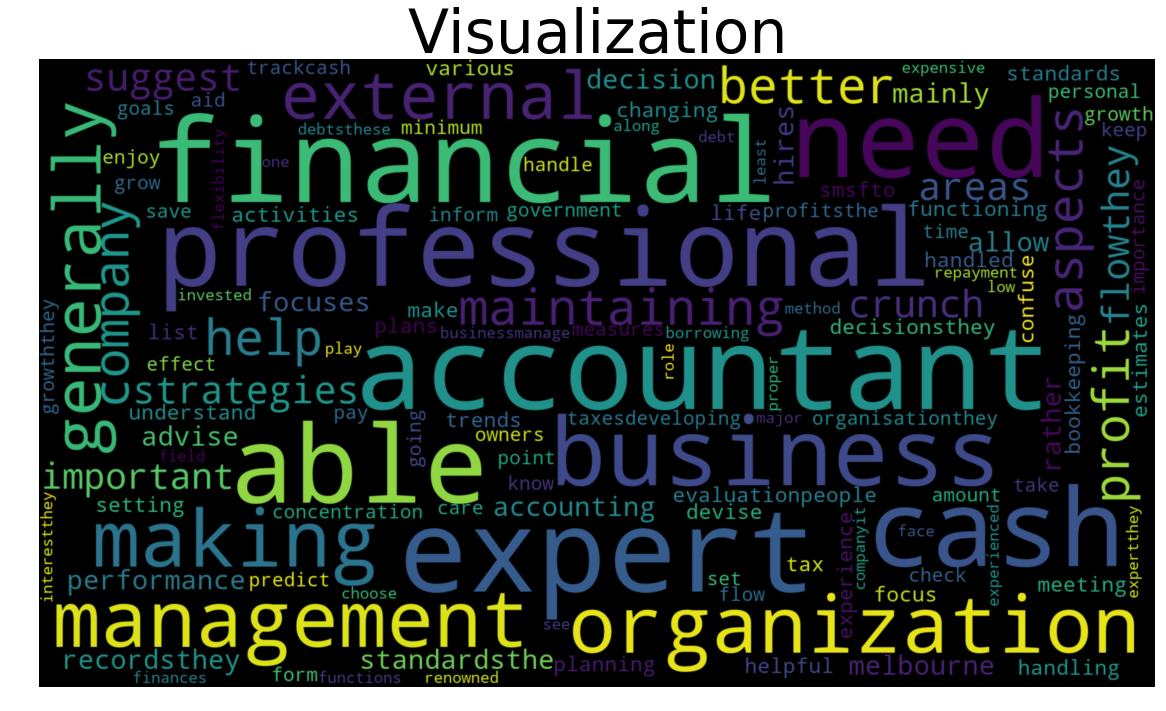

In [15]:
# Using the function created
wordcloud(str_, "Visualization") 

# Shows the words associated with private finance management such as expert, accountant, professional . etc

# Sentiment Analysis

In [16]:
Line = []
Blob1 = []
Blob2 = []
for line in pfm['Final_form']:
    blob = TextBlob(line) # the sentence itself
    blob1 = format(blob.polarity)# checking for polarity  of the sentence.
    blob2 = format(blob.subjectivity)# checking for  subjectivity of the sentence.
    Line.append(line)
    Blob1.append(blob1)
    Blob2.append(blob2)

pfm['Final_Review'] = Line
pfm['Polarity'] = Blob1
pfm['subjectivity'] = Blob2
   
    
pfm.head()

,Final_form,Final_Review,Polarity,subjectivity
0,a business accountant in melbourne mainly focu...,a business accountant in melbourne mainly focu...,0.08333333333333333,0.21666666666666667
1,the management generally hires them for mainta...,the management generally hires them for mainta...,0.02500000000000001,0.25
2,they advise in other aspects that allow the ma...,they advise in other aspects that allow the ma...,-0.125,0.375
3,people generally confuse these accountants wit...,people generally confuse these accountants wit...,0.016666666666666673,0.19999999999999998
4,the business accountants make estimates and tr...,the business accountants make estimates and tr...,0.0,0.0


### Polarity : this helps us find the expression and emotion of the user in the text and the value ranges from -1.0 to 1.0, where less than 0 denotes negative and greater 0 denotes positve.


### Subjectivity: this checks if a sentence is subjective or objective. Subjective sentences are based on personal opinions, beliefs and responses. Whereas objective sentences are based of facts. The value ranges from 0.0 to 1.0

In [17]:
# To make a clean frame, I would drop the final form and subjectivity column and focus on polarity.
pfm.drop(['Final_form'], axis = 1, inplace = True)
pfm.drop(['subjectivity'], axis = 1, inplace = True)


In [18]:
pfm.head()

,Final_Review,Polarity
0,a business accountant in melbourne mainly focu...,0.08333333333333333
1,the management generally hires them for mainta...,0.02500000000000001
2,they advise in other aspects that allow the ma...,-0.125
3,people generally confuse these accountants wit...,0.016666666666666673
4,the business accountants make estimates and tr...,0.0


In [19]:
# Polarity score greater than 0.0 will be considered positive, and less than 0.0 will be considered negative
pfm['grade'] = 0
pfm.loc[pfm['Polarity'] > str(0.0), 'grade'] = 1
pfm.loc[pfm['Polarity'] < str(0.0), 'grade'] = -1
pfm

,Final_Review,Polarity,grade
0,a business accountant in melbourne mainly focu...,0.08333333333333333,1
1,the management generally hires them for mainta...,0.02500000000000001,1
2,they advise in other aspects that allow the ma...,-0.125,-1
3,people generally confuse these accountants wit...,0.016666666666666673,1
4,the business accountants make estimates and tr...,0.0,0
5,they would be handling various aspects of the ...,0.0,0
6,to understand the functioning of a business bo...,0.3,1
7,tax planning the experience of the experts wo...,0.0,0
8,they would also take care that the company nee...,0.0,0
9,developing growth and profit strategies the p...,0.48,1


In [20]:
# we wont be focusing on neutral words which is indicated by a grade value of 0, hence I removed them.
new_folder1 = pfm[(pfm.grade == 1) | (pfm.grade == -1)]
new_folder1.head()

,Final_Review,Polarity,grade
0,a business accountant in melbourne mainly focu...,0.08333333333333333,1
1,the management generally hires them for mainta...,0.02500000000000001,1
2,they advise in other aspects that allow the ma...,-0.125,-1
3,people generally confuse these accountants wit...,0.016666666666666673,1
6,to understand the functioning of a business bo...,0.3,1


In [21]:
# To make the datafram clean we would remove the polarity column
new_folder1.drop(['Polarity'], axis = 1, inplace = True)

C:\Users\Kenechi\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


# RESULTS: 

In [22]:
print("Positive reviews:\n")
print(list(new_folder1[new_folder1['grade'] == 1].Final_Review)[:6])

Positive reviews:

['a business accountant in melbourne mainly focuses on the needs of the organization rather than external accounting standards', 'the management generally hires them for maintaining financial records', 'people generally confuse these accountants with financial experts  who focus on meeting external standards ', 'to understand the functioning of a business bookkeeping expert better  the list of activities handled by this professional are ', 'developing growth and profit strategies  the professionals would be able to point out the areas that need more concentration that could help an organization grow better and enjoy more profits', 'the goals set by them would aid in personal  professional and financial growth']


In [23]:
print("\nNegative reviews:\n")
print(list(new_folder1[new_folder1['grade'] ==-1].Final_Review)[:6])


Negative reviews:

['they advise in other aspects that allow the management in decision making and performance evaluation', 'manage debt  the accountant would be able to suggest the least expensive borrowing method along with repayment flexibility and low interest']


In [24]:
# # Get the number of negative thoughts and positive thoughts around personal finance management.
print(new_folder1.grade.value_counts())

 1    11
-1     2
Name: grade, dtype: int64


(array([0, 1]), <a list of 2 Text xticklabel objects>)

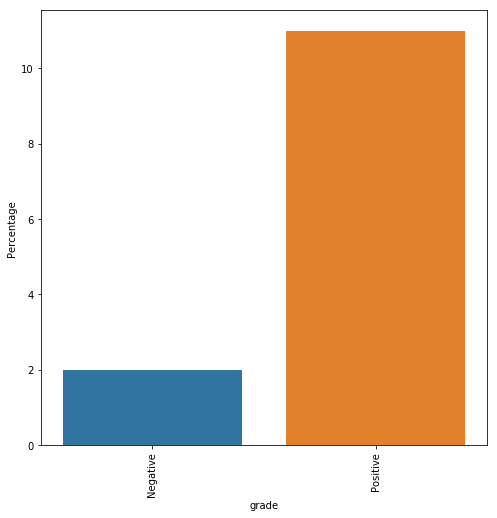

In [25]:
# Visualization
fig, ax = plt.subplots(figsize=(8, 8))
g = sns.countplot(new_folder1.grade * 100)
ax.set_xticklabels(['Negative', 'Positive'])
ax.set_ylabel("Percentage")

plt.xticks(rotation = 90)

### Based on the visualised data, it seems the idea of private financial management is duly accepted. 